In [35]:
import pyspark
from pyspark.sql import SparkSession
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
spark = SparkSession.builder.appName('Practice').getOrCreate()

In [3]:
spark

### Reading Data files

In [4]:
covid_deaths = spark.read.csv('../Data files/CovidDeaths.csv',header=True,inferSchema=True)

In [5]:
covid_vac = spark.read.csv('../Data files/CovidVaccination.csv',header=True,inferSchema=True)

In [29]:
covid_vac.printSchema()

root
 |-- iso_code: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- location: string (nullable = true)
 |-- date: string (nullable = true)
 |-- total_tests: long (nullable = true)
 |-- new_tests: integer (nullable = true)
 |-- total_tests_per_thousand: double (nullable = true)
 |-- new_tests_per_thousand: double (nullable = true)
 |-- new_tests_smoothed: integer (nullable = true)
 |-- new_tests_smoothed_per_thousand: double (nullable = true)
 |-- positive_rate: double (nullable = true)
 |-- tests_per_case: double (nullable = true)
 |-- tests_units: string (nullable = true)
 |-- total_vaccinations: long (nullable = true)
 |-- people_vaccinated: long (nullable = true)
 |-- people_fully_vaccinated: long (nullable = true)
 |-- total_boosters: long (nullable = true)
 |-- new_vaccinations: integer (nullable = true)
 |-- new_vaccinations_smoothed: integer (nullable = true)
 |-- total_vaccinations_per_hundred: double (nullable = true)
 |-- people_vaccinated_per_hundred: 

### Creating TeamView from pyspark DataFrame

In [6]:
covid_deaths.createOrReplaceTempView("covid_deaths")

In [7]:
covid_vac.createOrReplaceTempView("covid_vac")

In [5]:
result = spark.sql('Select location from covid_deaths ')

### Percentage of people infacted in USA

In [42]:
result = spark.sql('select location , date, total_cases,population,(total_cases/population)*100 as casepercentage \
 from covid_deaths where location like "%States%" ')

In [43]:
result.show()

+-------------+----------+-----------+----------+--------------------+
|     location|      date|total_cases|population|      casepercentage|
+-------------+----------+-----------+----------+--------------------+
|United States|22-01-2020|          1| 338289856|2.956044889504461E-7|
|United States|23-01-2020|          1| 338289856|2.956044889504461E-7|
|United States|24-01-2020|          2| 338289856|5.912089779008922E-7|
|United States|25-01-2020|          2| 338289856|5.912089779008922E-7|
|United States|26-01-2020|          5| 338289856|1.478022444752230...|
|United States|27-01-2020|          5| 338289856|1.478022444752230...|
|United States|28-01-2020|          5| 338289856|1.478022444752230...|
|United States|29-01-2020|          6| 338289856|1.773626933702676...|
|United States|30-01-2020|          6| 338289856|1.773626933702676...|
|United States|31-01-2020|          8| 338289856|2.364835911603568...|
|United States|01-02-2020|          8| 338289856|2.364835911603568...|
|Unite

### Highest Infection rate compared to population

In [16]:
from pyspark.sql.functions import max
result.select(max(result.casepercentage)).show()

+-------------------+
|max(casepercentage)|
+-------------------+
| 30.638500729977547|
+-------------------+



In [27]:
result = spark.sql('select location, max(total_cases) as HighestInfactionCount, max((total_cases/population))*100 as percentageOfcp from covid_deaths group by location order by location')

In [28]:
result.show()

+-------------------+---------------------+------------------+
|           location|HighestInfactionCount|    percentageOfcp|
+-------------------+---------------------+------------------+
|        Afghanistan|               209390|0.5091083195968019|
|             Africa|             12520936|0.8775926738780674|
|            Albania|               334427|11.765995219394874|
|            Algeria|               271477|0.6045823698910912|
|            Andorra|                47875| 59.96142429517929|
|             Angola|               105277|0.2958133463500909|
|           Anguilla|                 3904|24.589028153933363|
|Antigua and Barbuda|                 9106| 9.710787868446872|
|          Argentina|             10044125| 22.06999229449564|
|            Armenia|               446819| 16.06989748503132|
|              Aruba|                44145|41.466667919105014|
|               Asia|            210662602| 4.461883001040858|
|          Australia|             11385534| 43.49373753

### Country with highest death count per population

In [32]:
result = spark.sql('select location, max(total_deaths) as HighestDeathsCount, max((total_deaths/population))*100 as percentageOfdp from covid_deaths group by location order by location')

In [33]:
result.show()

+-------------------+------------------+--------------------+
|           location|HighestDeathsCount|      percentageOfdp|
+-------------------+------------------+--------------------+
|        Afghanistan|              7896|0.019198239130504554|
|             Africa|            257685| 0.01806114719924052|
|            Albania|              3598| 0.12658682103832156|
|            Algeria|              6881|0.015324065343364624|
|            Andorra|               165|  0.2066555615395213|
|             Angola|              1933|0.005431454149479238|
|           Anguilla|                12| 0.07558102916168041|
|Antigua and Barbuda|               146|  0.1556967964850915|
|          Argentina|            130463| 0.28666682311468494|
|            Armenia|              8721| 0.31365178286276574|
|              Aruba|               282| 0.26489070909927764|
|               Asia|           1623264| 0.03438110978901508|
|          Australia|             19459| 0.07433508509818197|
|       

### Total deaths by continents

In [38]:
result = spark.sql('select continent,sum(total_deaths) as total_deaths_by_continent from covid_deaths where continent is not null group by continent order by total_deaths_by_continent desc')

In [39]:
result.show()

+-------------+-------------------------+
|    continent|total_deaths_by_continent|
+-------------+-------------------------+
|       Europe|               1281696114|
|North America|               1029403625|
|         Asia|                952270253|
|South America|                948509832|
|       Africa|                172695043|
|      Oceania|                  7590937|
+-------------+-------------------------+



### Total deaths by location

In [40]:
result = spark.sql('select location,sum(total_deaths) as total_deaths_by_location from covid_deaths where location is not null group by location order by total_deaths_by_location desc')

In [41]:
result.show()

+-------------------+------------------------+
|           location|total_deaths_by_location|
+-------------------+------------------------+
|              World|              4392182079|
|        High income|              1788049676|
|Upper middle income|              1694441842|
|             Europe|              1281696114|
|      North America|              1029403625|
|               Asia|               952270253|
|      South America|               948509832|
|Lower middle income|               878358163|
|     European Union|               774975563|
|      United States|               709412232|
|             Brazil|               485383896|
|              India|               362798132|
|             Mexico|               239752595|
|             Russia|               219429921|
|             Africa|               172695043|
|               Peru|               169871745|
|     United Kingdom|               159512825|
|              Italy|               127183496|
|            

In [57]:
result = spark.sql('select location,sum(new_cases) as total_new_cases from covid_deaths where location is not null group by location') 

In [58]:
result.show()

+--------------------+---------------+
|            location|total_new_cases|
+--------------------+---------------+
|            Anguilla|           3904|
|         Afghanistan|         209446|
|              Africa|       12507789|
|British Virgin Is...|           7305|
|             Algeria|         271477|
|           Argentina|       10044125|
|              Angola|         105277|
|             Belgium|        4727795|
|Bonaire Sint Eust...|          11804|
|             Albania|         334427|
|               Benin|          28199|
|             Bahamas|          37539|
|             Belarus|         994037|
|             Andorra|          47875|
|             Bolivia|        1193908|
|          Bangladesh|        2037829|
|            Barbados|         106645|
|              Bhutan|          62620|
|               Aruba|          44898|
|          Azerbaijan|         828746|
+--------------------+---------------+
only showing top 20 rows



In [10]:
result = spark.sql('select dea.continent,dea.location,dea.date,dea.population,vac.new_vaccinations, sum(vac.new_vaccinations) over(partition by dea.location order by dea.date) as total_vac from covid_deaths dea join covid_vac vac on dea.location = vac.location and dea.date = vac.date where dea.continent is not null')

In [11]:
result.show()

+---------+-----------+----------+----------+----------------+---------+
|continent|   location|      date|population|new_vaccinations|total_vac|
+---------+-----------+----------+----------+----------------+---------+
|     Asia|Afghanistan|01-01-2021|  41128772|            null|     null|
|     Asia|Afghanistan|01-01-2022|  41128772|            null|     null|
|     Asia|Afghanistan|01-01-2023|  41128772|            null|     null|
|     Asia|Afghanistan|01-02-2021|  41128772|            null|     null|
|     Asia|Afghanistan|01-02-2022|  41128772|            null|     null|
|     Asia|Afghanistan|01-02-2023|  41128772|            null|     null|
|     Asia|Afghanistan|01-03-2020|  41128772|            null|     null|
|     Asia|Afghanistan|01-03-2021|  41128772|            null|     null|
|     Asia|Afghanistan|01-03-2022|  41128772|            null|     null|
|     Asia|Afghanistan|01-03-2023|  41128772|            null|     null|
|     Asia|Afghanistan|01-04-2020|  41128772|      

### New cases in india over the time

In [44]:
result = spark.sql('select date,new_cases from covid_deaths where location="India"')

In [45]:
result = result.toPandas()

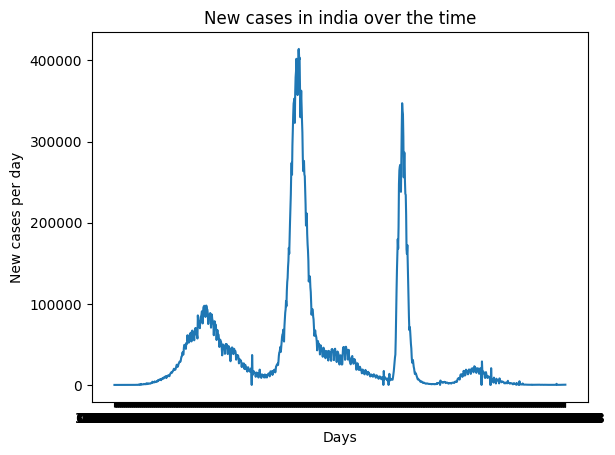

In [46]:

sns.lineplot(x='date',y='new_cases',data=result)
plt.xlabel('Days')
plt.ylabel('New cases per day')
plt.title('New cases in india over the time')
plt.show()

### Death cases over time in india 

In [48]:
result = spark.sql('select date,new_deaths from covid_deaths where location="India"')

In [49]:
result = result.toPandas()
#result.dropna(inplace=True)

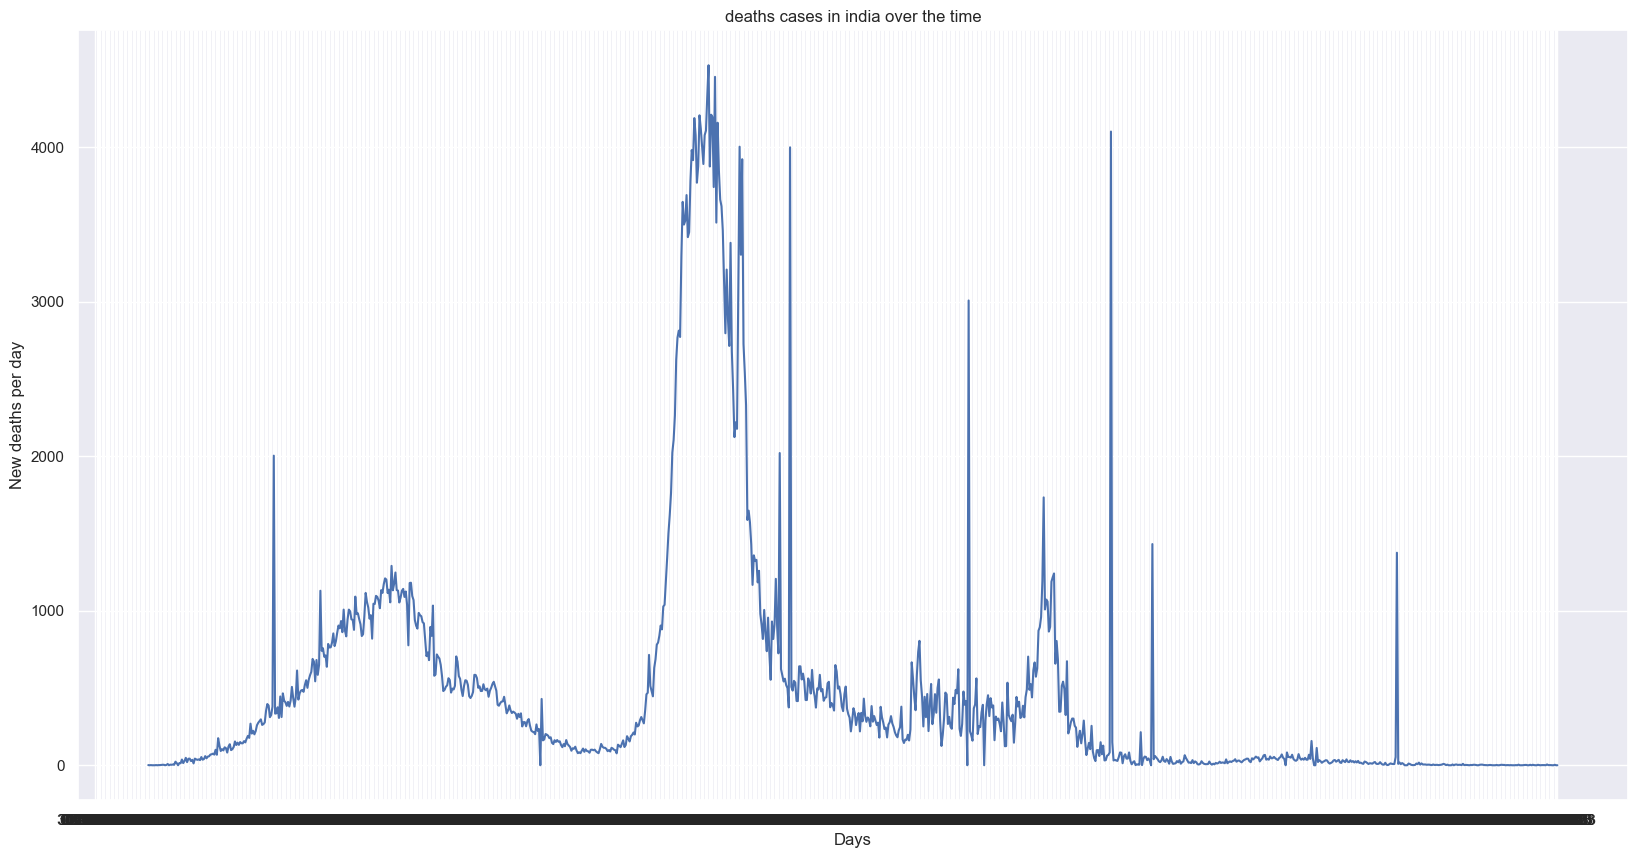

In [59]:
sns.lineplot(x='date',y='new_deaths',data=result)
#sns.set(rc={"figure.figsize":(20, 10)})
#plt.figure(figsize=[20,10])
plt.xlabel('Days')
plt.ylabel('New deaths per day')
plt.title('deaths cases in india over the time')
plt.show()


### total deaths case by conitent

In [67]:
total_case_con = spark.sql('select continent,sum(total_deaths) as total_deaths_by_continent from covid_deaths where continent is not null group by continent ')

In [68]:
total_case_con = total_case_con.toPandas()

In [69]:
total_case_con

,continent,total_deaths_by_continent
0,Europe,1281696114
1,Africa,172695043
2,North America,1029403625
3,South America,948509832
4,Oceania,7590937
5,Asia,952270253


<Axes: xlabel='continent', ylabel='total_deaths_by_continent'>

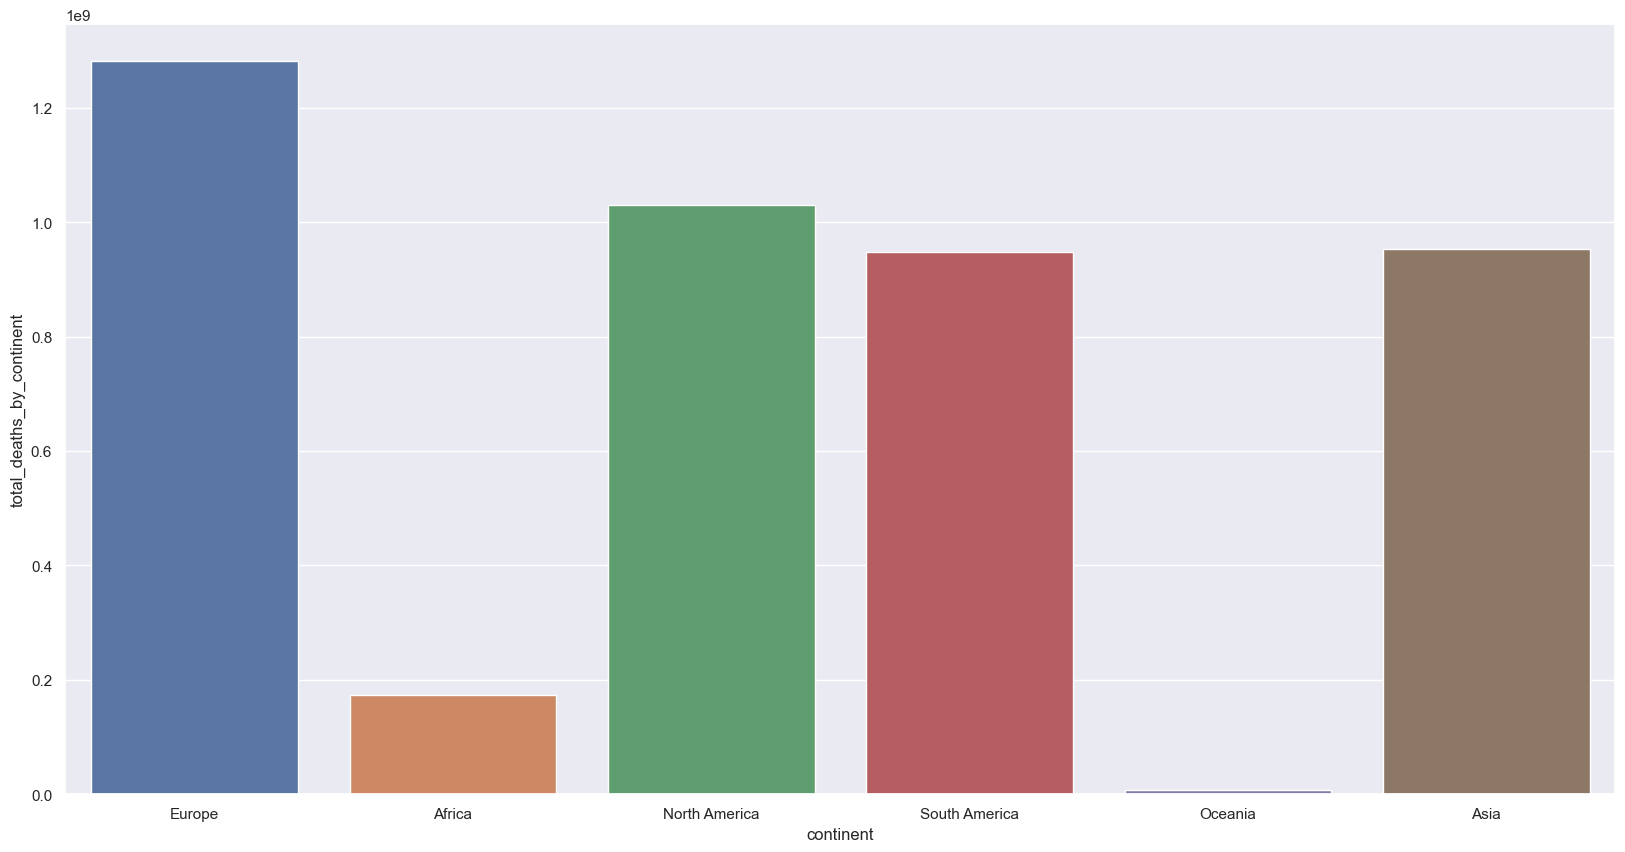

In [70]:
sns.barplot(x='continent',y='total_deaths_by_continent',data=total_case_con)

### Total vaccination by continent

In [31]:
total_vac_con = spark.sql('select continent, sum(new_vaccinations) as total_vaccination from covid_vac group by continent order by total_vaccination asc')

In [22]:
total_vac_con.show()

+-------------+-----------------+
|    continent|total_vaccination|
+-------------+-----------------+
|      Oceania|         74475559|
|       Africa|        117367074|
|South America|        840220868|
|North America|        992431174|
|       Europe|       1277265880|
|         Asia|       7545032949|
|         null|      40860243246|
+-------------+-----------------+



In [32]:
total_vac_con = total_vac_con.toPandas()
%matplotlib inline

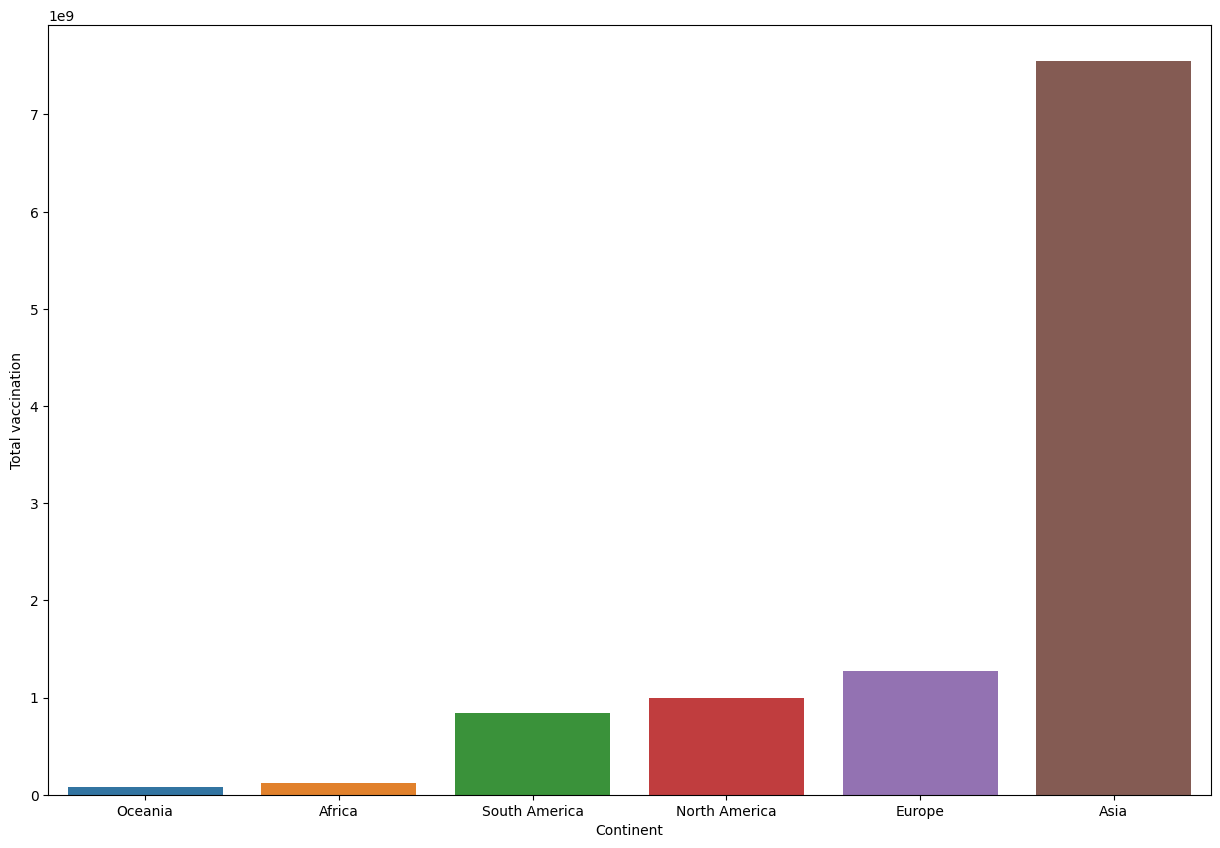

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(x='continent',y='total_vaccination',data=total_vac_con)
plt.xlabel('Continent')
plt.ylabel('Total vaccination')
plt.show()